In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
import tensorflow as tf

### Set Model-to-Evaluate

In [2]:
model = "review-representative-m500"
variant = 1

### Load Data

In [3]:
with open("../evaluated/{}.json".format(model),"r") as fp:
    data = json.load(fp)

In [4]:
data = data[str(variant)]

In [5]:
G = tf.keras.models.model_from_json(data["G"])
G.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 125)               250       
_________________________________________________________________
dense_6 (Dense)              (None, 125)               15750     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 126       
Total params: 16,126
Trainable params: 16,126
Non-trainable params: 0
_________________________________________________________________


In [6]:
D = tf.keras.models.model_from_json(data["D"])
D.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               1100      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 31,501
Trainable params: 31,501
Non-trainable params: 0
_________________________________________________________________


## Visualizations

### Risks

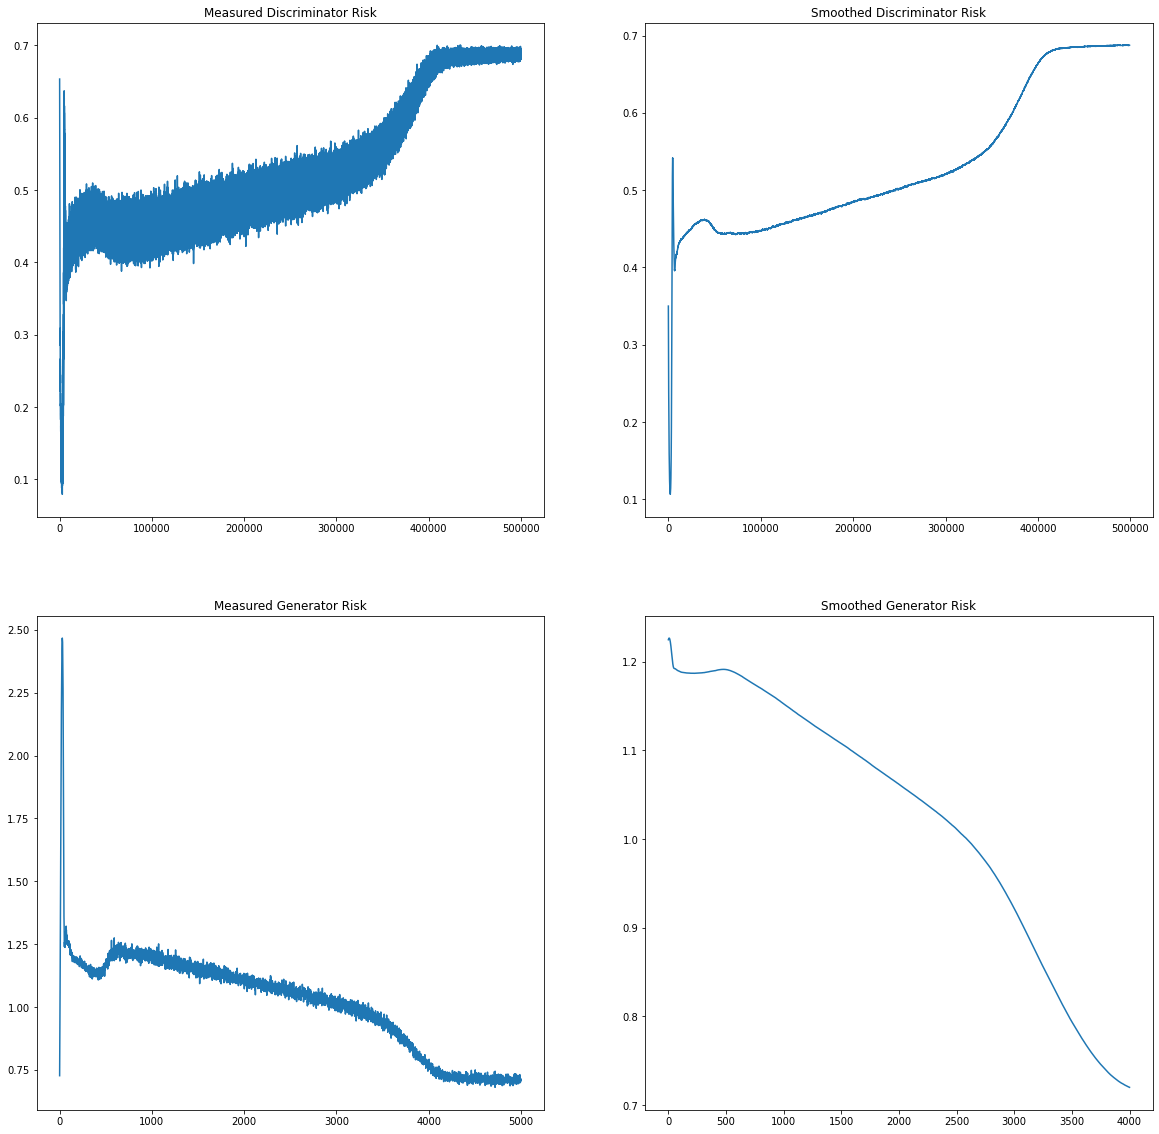

In [23]:
n_ma = 1000
plt.figure(figsize=(20,20))#
# Discriminator
plt.subplot(2,2,1)
plt.title("Measured Discriminator Risk")
plt.plot(data["Risk"]["R_d"])
plt.subplot(2,2,2)
plt.title("Smoothed Discriminator Risk")
plt.plot(np.convolve(data["Risk"]["R_d"], np.ones(n_ma)/n_ma, mode='valid'))
# Generator
plt.subplot(2,2,3)
plt.title("Measured Generator Risk")
plt.plot(data["Risk"]["R_g"])
plt.subplot(2,2,4)
plt.title("Smoothed Generator Risk")
plt.plot(np.convolve(data["Risk"]["R_g"], np.ones(n_ma)/n_ma, mode='valid'))
# Display
plt.show()

### Classification Metrics

In [24]:
def plot_metrics(acc_chart, prc_chart, rec_chart, spc_chart):
    plt.cla();plt.clf()
    plt.figure(figsize=(20,20))
    # Acc
    plt.subplot(2,2,1)
    plt.title("Accuracy [ (tp+tn)/n ] des Diskriminators")
    plt.plot(acc_chart)
    # Prc
    plt.subplot(2,2,2)
    plt.title("Precision [ tp/(tp+fp) ] des Diskriminators")
    plt.plot(prc_chart)
    # Rec
    plt.subplot(2,2,3)
    plt.title("Recall [ tp/(tp+fn) ] des Diskriminators")
    plt.plot(rec_chart)
    # Acc
    plt.subplot(2,2,4)
    plt.title("Specificity [ tn/(tn+fp) ] des Diskriminators")
    plt.plot(spc_chart)
    # Display
    plt.show()

<Figure size 432x288 with 0 Axes>

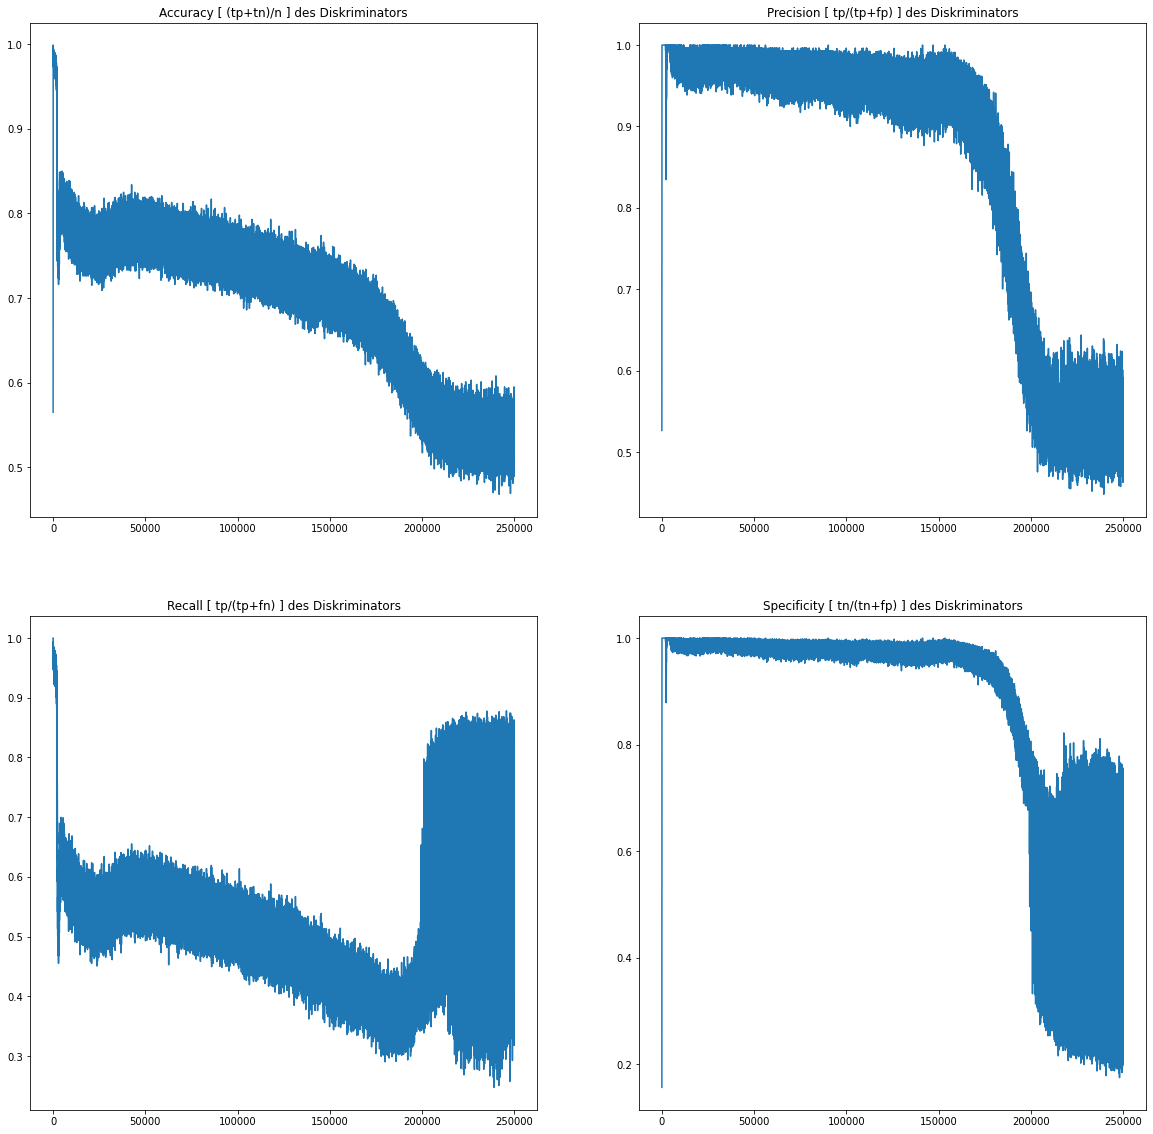

In [26]:
plot_metrics(
    data["Classification"]["acc_chart"],
    data["Classification"]["prc_chart"],
    data["Classification"]["rec_chart"],
    data["Classification"]["spc_chart"]
)

<Figure size 432x288 with 0 Axes>

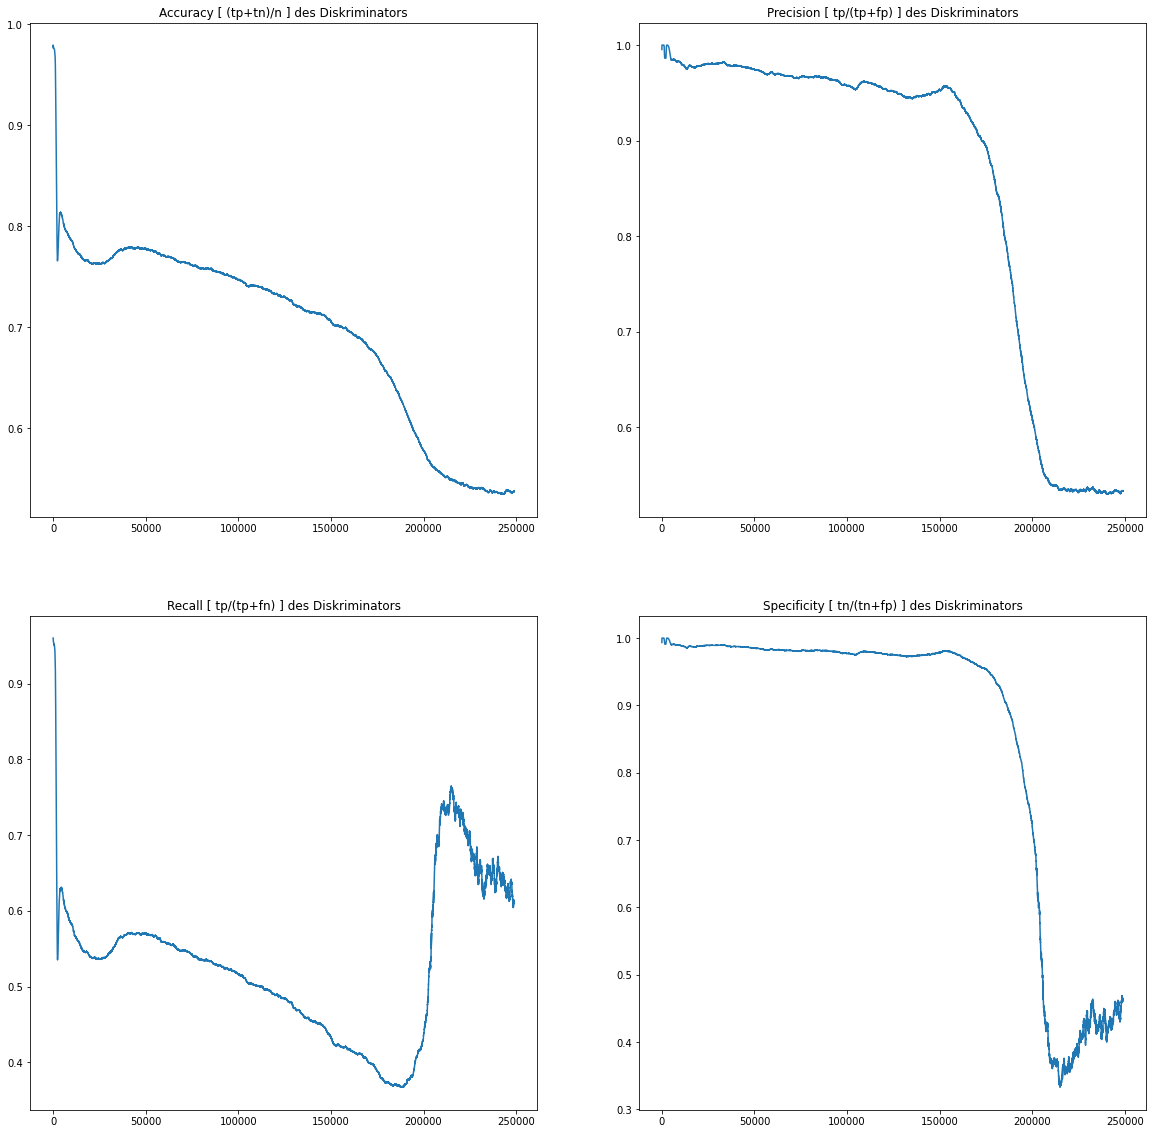

In [29]:
n_ma = 1000
plot_metrics(
    np.convolve(data["Classification"]["acc_chart"], np.ones(n_ma)/n_ma, mode='valid'),
    np.convolve(data["Classification"]["prc_chart"], np.ones(n_ma)/n_ma, mode='valid'),
    np.convolve(data["Classification"]["rec_chart"], np.ones(n_ma)/n_ma, mode='valid'),
    np.convolve(data["Classification"]["spc_chart"], np.ones(n_ma)/n_ma, mode='valid'),
)

### Distributions

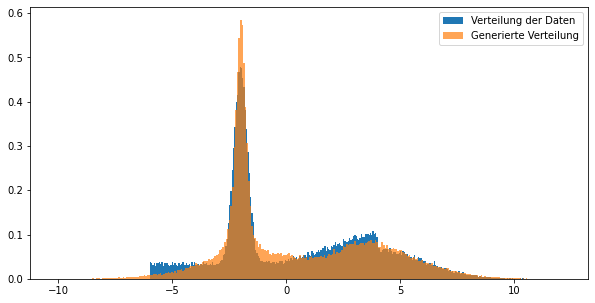

In [39]:
N = len(data["Samples"]["data"])
plt.figure(figsize=(10,5))
plt.hist(np.ravel(np.array(data["Samples"]["data"])), bins=int(np.sqrt(N)), label="Verteilung der Daten", density=True)
plt.hist(np.ravel(np.array(data["Samples"]["generator"])), bins=int(np.sqrt(N)), label="Generierte Verteilung", alpha=0.7, density=True)
plt.legend()
plt.show()

### CDF

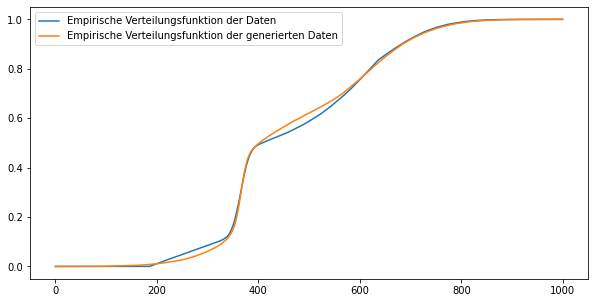

In [40]:
plt.figure(figsize=(10,5))
plt.plot(data["CDF"]["data"], label="Empirische Verteilungsfunktion der Daten")
plt.plot(data["CDF"]["generated"], label="Empirische Verteilungsfunktion der generierten Daten")
plt.legend()
plt.show()

## Calculations

### sup |P(X)-P(U)|

In [49]:
diffs = np.array(data["CDF"]["data"]) - np.array(data["CDF"]["generated"])
abs_diff = np.abs(diffs)
print("sup |P(X)-P(U)| = {:.3%}".format(np.max(abs_diff)))

sup |P(X)-P(U)| = 3.449%
